In [72]:
# Import dependencies
import pandas as pd

In [3]:
# Read in the dataframe

df = pd.read_csv("./resources/datasets/BeerDataScienceProject.tar.bz2", compression="bz2")

# Explore Data

In [4]:
# View shape of the dataframe
df.shape

(528870, 13)

In [5]:
# View the first 5 rows of the dataframe
df.head(5)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [6]:
# View data types of the dataframe
df.dtypes

beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time             int64
dtype: object

In [9]:
# Get statistics from the review columns
df[["review_appearance", "review_overall", "review_aroma", "review_palette", "review_taste"]].describe()

,review_appearance,review_overall,review_aroma,review_palette,review_taste
count,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000
mean,3.864522,3.833197,3.817350,3.758926,3.765993
std,0.604010,0.709962,0.718903,0.685335,0.669018
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.500000,4.500000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
# View columns where review appearance is 0 and review overall is 0
df[(df["review_appearance"] == 0) & (df["review_overall"] == 0)]

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
39601,4.0,3806,1413,Pub Pils,Czech Pilsener,0.0,2.0,0.0,3.0,beernut7,2.0,This is one of the most commercial tasting mic...,1030197670
39617,4.0,3804,1413,Latter Days Stout,Irish Dry Stout,0.0,4.0,0.0,2.0,beernut7,2.0,This beer presents with a heavy smoky roast ar...,1030267158
39638,4.0,3810,1413,Utah Pale Ale,American Pale Ale (APA),0.0,3.0,0.0,2.0,beernut7,2.0,This American pale ale has a spicy grassy hop ...,1030266889


In [14]:
# Drop the rows where review appearance is 0 and review overall is 0
df = df.drop(df[(df["review_appearance"] == 0) & (df["review_overall"] == 0)].index)

In [10]:
# Find null values in the dataframe
df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [16]:
# Drop null values
df = df.dropna()

# Find null values in the dataframe
df.isnull().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

In [18]:
## It's possible that the same user has left multiple reviews for the same beer, 
## which could skew the data. Let's find out if this is the case.

# Find times when review_profileName has left multiple reviews for the same beer
df[df.duplicated(["review_profileName", "beer_beerId"], keep=False)].sort_values(["review_profileName", "beer_beerId"])

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
93678,7.2,30420,140,Sierra Nevada Torpedo Extra IPA,American IPA,4.0,2.0,3.0,3.5,100floods,3.0,Pours a mostly clearly burnt yellow hue with a...,1298151357
93798,7.2,30420,140,Sierra Nevada Torpedo Extra IPA,American IPA,3.0,3.5,4.5,3.0,100floods,4.5,"Pours a nice amber/burnt orange, nice cream he...",1290908318
84099,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,4.5,4.5,4.0,4.0,11osixBrew,4.0,Had this one on tap at the Hartford Road Cafe....,1201187157
84101,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,4.5,5.0,5.0,4.5,11osixBrew,4.5,12 Oz standard Sierra Nevada bottle served aro...,1201010077
83328,6.8,1904,140,Sierra Nevada Celebration Ale,American IPA,4.0,4.0,3.5,3.0,1759Girl,4.5,"Appearance&gt; Hazy, dark amber. Very lively. ...",1259646203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82621,8.2,61593,140,Ghidorah Double IPA - Beer Camp #29,American Double / Imperial IPA,4.5,4.5,4.0,3.0,zoolzoo,4.0,"On tap @ Prime 16, New Haven CT. A pleasant su...",1285792821
34530,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.5,4.0,5.0,zoso1967,4.5,Enjoyed on nitro-tap at the 2011 KBS release w...,1300222331
34930,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.5,4.0,4.5,zoso1967,5.0,Pours deep dark black with only a tinge of bro...,1271963620
281031,4.9,104,35,Samuel Adams Boston Lager,Vienna Lager,4.0,4.5,4.0,3.5,zymurgy4all,4.0,This is the good ol standby beer. If you can't...,1201480527


In [19]:
# Keep only the latest review for each user and beer
df = df.drop_duplicates(["review_profileName", "beer_beerId"], keep="last")

# Find times when review_profileName has left multiple reviews for the same beer
df[df.duplicated(["review_profileName", "beer_beerId"], keep=False)].sort_values(["review_profileName", "beer_beerId"])

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time


In [20]:
# View the shape of the dataframe
df.shape

(503697, 13)

# Rank the top 3 breweries which produce the strongest beers.

In [26]:
# View dataframe
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [27]:
df.sort_values(["beer_ABV"], ascending=False).head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.70,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
12909,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,Sunnanek,4.0,43% ABV - this is so crazy! A: Pour is warm am...,1309974178
12910,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,4.0,4.0,3.5,4.0,kappldav123,4.5,"The bottle looks really great, handnumbered an...",1274469798
12911,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.0,3.0,3.0,2.0,orangesol,3.0,Thanks to foofaa for sharing his sample with m...,1321041551
12913,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,4.5,4.5,4.0,4.0,kappldav123,4.5,The new world strongest beer - I thing it will...,1264684153


In [28]:
# Determine the top 3 breweries with the highest average ABV
ABVrank_df = df.groupby(["beer_brewerId"]).mean().sort_values(["beer_ABV"], ascending=False).head(3)

# Rank the breweries by average ABV and output top 3
ABVrank_df["rank"] = ABVrank_df["beer_ABV"].rank(method="dense", ascending=False)

# View the dataframe
ABVrank_df

,beer_ABV,beer_beerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time,rank
beer_brewerId,,,,,,,,,
6513,19.228824,34235.676471,3.558824,3.529412,3.411765,3.470588,3.514706,1.219645e+09,1.0
736,13.750000,3532.888889,3.916667,4.333333,3.805556,4.083333,4.222222,1.058254e+09,2.0
24215,12.466667,69983.000000,3.833333,4.000000,3.833333,3.833333,3.833333,1.313067e+09,3.0


# 2. Which year did beers enjoy the highest ratings?

In [30]:
# Convert review_time to datetime
df["review_time"] = pd.to_datetime(df["review_time"], unit="s")

In [31]:
# View the datatypes
df.dtypes

beer_ABV                     float64
beer_beerId                    int64
beer_brewerId                  int64
beer_name                     object
beer_style                    object
review_appearance            float64
review_palette               float64
review_overall               float64
review_taste                 float64
review_profileName            object
review_aroma                 float64
review_text                   object
review_time           datetime64[ns]
dtype: object

In [32]:
# Determine which years have the most reviews
df["review_year"] = df["review_time"].dt.year
df["review_year"].value_counts()


2011    107055
2010     90449
2009     80451
2008     65983
2007     44080
2006     40353
2005     27520
2004     21053
2003     16348
2002      6768
2012      3051
2001       535
2000        30
1998        11
1999        10
Name: review_year, dtype: int64

In [45]:
# Determine avg review overall for each year and sort by review_year descending
df.groupby(["review_year"]).mean()["review_overall"].sort_values(ascending=False)

review_year
2000    4.233333
1998    4.045455
1999    4.000000
2001    3.967290
2010    3.867760
2009    3.866820
2005    3.842951
2012    3.839397
2008    3.838466
2011    3.831801
2002    3.817967
2007    3.817763
2006    3.807276
2004    3.804470
2003    3.771409
Name: review_overall, dtype: float64

In [48]:
# Create a new dataframe with review_time, reviews_per_year, and avg_review_overall
review_year_df = df.groupby(["review_year"]).agg({"review_time": "count", "review_overall": "mean"})
review_year_df = review_year_df.rename(columns={"review_time": "reviews_per_year", "review_overall": "avg_review_overall"})

# Sort by review_year
review_year_df = review_year_df.sort_values(["review_year"], ascending=False)

# Create an index for the dataframe
review_year_df = review_year_df.reset_index()

# View the dataframe
review_year_df

,review_year,reviews_per_year,avg_review_overall
0,2012,3051,3.839397
1,2011,107055,3.831801
2,2010,90449,3.867760
3,2009,80451,3.866820
4,2008,65983,3.838466
5,2007,44080,3.817763
6,2006,40353,3.807276
7,2005,27520,3.842951
8,2004,21053,3.804470
9,2003,16348,3.771409


/Users/avatarjoshi/miniforge3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


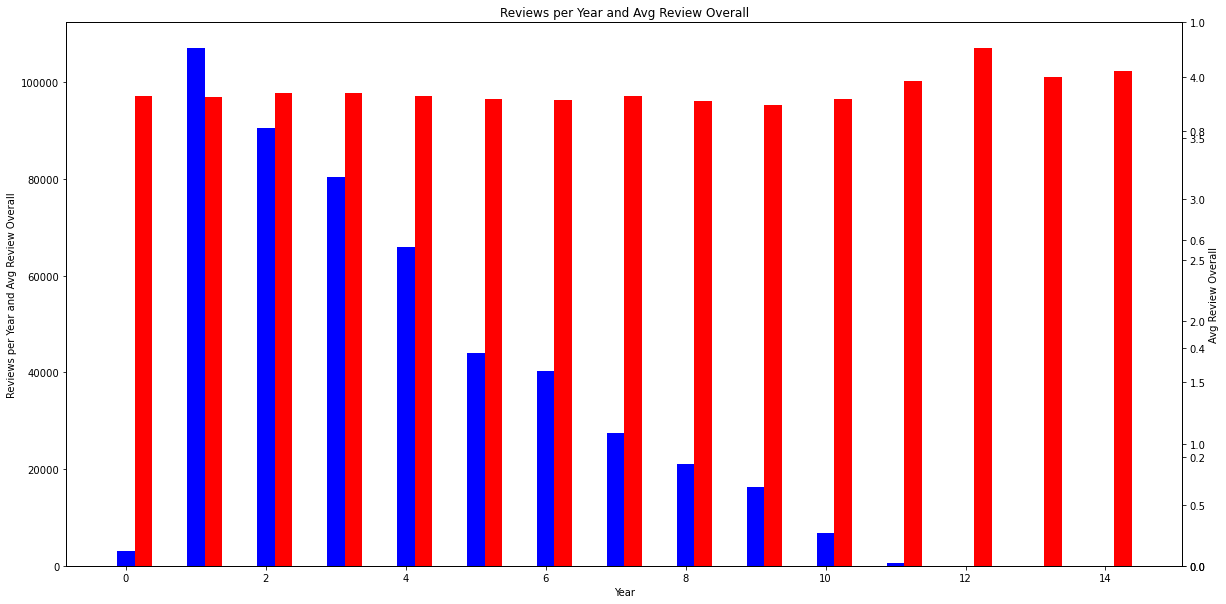

In [78]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np

## Create a chart where reviews per year and avg review overall are side by side

# Set the figure size
figure = plt.figure(figsize=(20, 10))

# Set the x-axis and tick locations
N = len(review_year_df["review_year"])
ind = np.arange(N)
width = 0.25

# Create text and labels
plt.title("Reviews per Year and Avg Review Overall")
plt.xlabel("Year")
# Create title for left y-axis
plt.ylabel("Reviews per Year and Avg Review Overall")
# Create title for right y-axis
plt.twinx().set_ylabel("Avg Review Overall")


ax1 = figure.add_subplot(111)
ax2 = ax1.twinx()
rects1 = ax1.bar(ind, review_year_df["reviews_per_year"], width, color="blue")
rects2 = ax2.bar(ind + width, review_year_df["avg_review_overall"], width, color="red")


# Show the chart
plt.show()




# Q3: Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

In [35]:
# Determine the mean for review taste, review aroma, review appearance, review palate, and review overall
# Group them by beer_id
review_df = df.groupby(["beer_beerId"])[["review_taste", "review_aroma", "review_appearance", "review_palette", "review_overall"]].mean()
review_df.head()

,review_taste,review_aroma,review_appearance,review_palette,review_overall
beer_beerId,,,,,
3,4.166667,4.166667,3.833333,4.000000,4.166667
4,3.700000,3.450000,3.950000,3.800000,3.700000
5,3.318396,3.340802,3.485849,3.205189,3.549528
6,3.513113,3.645382,3.836374,3.515964,3.706956
7,3.106980,3.101669,3.251138,3.179059,3.266313


In [36]:
# Determine correllation from review_df
review_df.corr()

,review_taste,review_aroma,review_appearance,review_palette,review_overall
review_taste,1.000000,0.821956,0.659598,0.736896,0.809601
review_aroma,0.821956,1.000000,0.637400,0.813106,0.873737
review_appearance,0.659598,0.637400,1.000000,0.647649,0.614839
review_palette,0.736896,0.813106,0.647649,1.000000,0.747198
review_overall,0.809601,0.873737,0.614839,0.747198,1.000000


<AxesSubplot:>

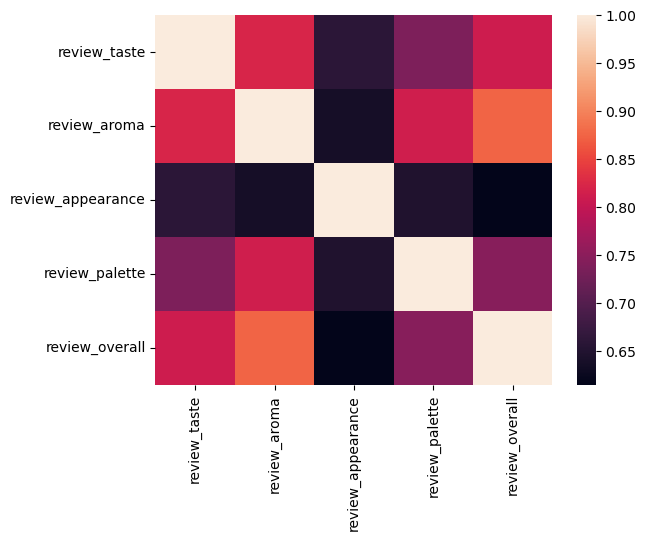

In [37]:
# Import heatmap from seaborn
from seaborn import heatmap

# Create a heatmap of the correlation dataframe
heatmap(review_df.corr())


Q4. If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

In [38]:
# Create a new dataframe column that shows the number of reviews for each beer
df["review_count"] = df.groupby(["beer_beerId"])["review_overall"].transform("count")
df["review_count"].value_counts()

1      7135
2      6588
3      5310
4      4672
5      4055
       ... 
142     142
137     137
132     132
123     123
117     117
Name: review_count, Length: 596, dtype: int64

In [39]:
# Create a new dataframe that only contains beers with more than 100 reviews
review_df = df[df["review_count"] > 100]

# Create a new dataframe that only contains the columns we need
review_df = review_df[["beer_beerId", "beer_name", "beer_style", "beer_ABV", "review_taste", "review_aroma", "review_appearance", "review_palette", "review_overall", "review_count"]]

In [40]:
# Find the top 3 beers with the highest average review overall, review_taste, review_aroma and ther are no null values
review_df = review_df.dropna().groupby(["beer_name"]).mean().sort_values(["review_overall", "review_taste", "review_aroma", "review_count"], ascending=False).head(3)

# View the dataframe
review_df

/var/folders/bj/m8tksvx513b63lgr8fw9z7vc0000gn/T/ipykernel_75656/360590570.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  review_df = review_df.dropna().groupby(["beer_name"]).mean().sort_values(["review_overall", "review_taste", "review_aroma", "review_count"], ascending=False).head(3)


,beer_beerId,beer_ABV,review_taste,review_aroma,review_appearance,review_palette,review_overall,review_count
beer_name,,,,,,,,
Citra DIPA,56082.0,8.0,4.373016,4.573413,4.369048,4.690476,4.630952,252.0
Cantillon Blåbær Lambik,36316.0,5.0,4.493590,4.628205,4.644231,4.528846,4.628205,156.0
Heady Topper,16814.0,8.0,4.405117,4.608742,4.163113,4.660981,4.625800,469.0


Q5. Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

In [41]:
# import dependencies for NLP sentiment analysis
from nltk import download
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [42]:
# Download the VADER lexicon
download("vader_lexicon", quiet=True)

True

In [43]:
analyser = SentimentIntensityAnalyzer()

In [46]:
# Create a new column that shows the sentiment of the review
df["review_sentiment"] = df["review_text"].apply(lambda review: analyser.polarity_scores(str(review)))
# df['score'] = df['review'].apply(lambda review:sid.polarity_scores(str(review)))


In [51]:
df.dtypes

beer_ABV                     float64
beer_beerId                    int64
beer_brewerId                  int64
beer_name                     object
beer_style                    object
review_appearance            float64
review_palette               float64
review_overall               float64
review_taste                 float64
review_profileName            object
review_aroma                 float64
review_text                   object
review_time           datetime64[ns]
review_year                    int64
review_month                   int64
review_count                   int64
review_sentiment              object
dtype: object

In [50]:
# Sort the dataframe by the sentiment score and group by beer_name
df.groupby(by="beer_style")["review_sentiment"].agg(func=["mean", "count"]).sort_values(by="mean", ascending=False)

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'